*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 16-2:  Confidence interval for duration of action movies

We will use the IMDb movie rating dataset from Lab 9 and Homework 9-1 and 9-2.  

1. Compute the 95% confidence interval of the median duration of all action movies by taking 10,000 bootstrap samples.

3. Plot a histogram of the medians heights of the bootstrap samples computed in part 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load the movies dataset into a dataframe
movies = pd.read_csv("../../data/imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
# filter to get all action movies
action_filter = movies["genre"] == "Action"
action_movies = movies[action_filter]
action_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."


In [5]:
# calculate the number of action movies
action_movies.shape[0]

136

In [6]:
# calculate 10,000 bootstrap samples
medians = []
for i in range(10000):
    # simulate the bootstrap sample
    bootstrap_sample = action_movies.sample(136, replace = True)
    # take the mean of the bootstrap sample
    sample_median = bootstrap_sample["duration"].median()
    # add the mean to the list of means
    medians.append(sample_median)

Text(0, 0.5, '# of bootstrap samples')

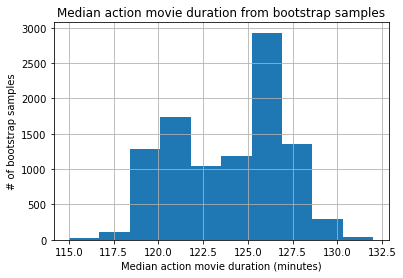

In [7]:
# plot the bootstrap sample medians in a histogram
pd.Series(medians).hist()
plt.title("Median action movie duration from bootstrap samples")
plt.xlabel("Median action movie duration (minutes)")
plt.ylabel("# of bootstrap samples")

In [8]:
# compute the left side of the 95% confidence interval
pd.Series(medians).quantile(0.025)

119.0

In [9]:
# compute the right side of the 95% confidence interval
pd.Series(medians).quantile(0.975)

129.0

1. What is the 95% confidence interval of the median duration of an action movie?
2. Describe the histogram of the medians of the bootstrap samples.

Write your answers below.

1.  The 95% confidence interval is (119 min, 129 min).
2.  The histogram is not very symmetric.  It has a large peak around 125 min and a smaller peak around 121 min, but there is a dip in between them.